In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.ticker import AutoMinorLocator, ScalarFormatter, FuncFormatter, LogLocator, MultipleLocator

In [3]:
obspec = np.asfortranarray(np.loadtxt("/Users/harshil/PycharmProjects/Brewster/OSC_upload/0359/0359_full_spectrum.txt",dtype='d',unpack=True))

specdist = np.empty([obspec[0].size,5])

specdist[:,2], specdist[:,1],specdist[:,3],specdist[:,0],specdist[:,4] = np.loadtxt("/Users/harshil/PycharmProjects/Brewster/Retrieved_results/Retrieved_model_spectrum/0359_model_spectrum.txt")

In [6]:
residual_median = specdist[:,2]-obspec[1,:]

In [6]:
fontsize = 12
labelsize=16

tick_labelsize=12

tick_length = 5
tick_width = 1

fig_width = 3.5

fig_width_2 = 7.25

In [7]:
def add_interval(ax, xdata, ydata, label, caps="|", c='black', textsize=fontsize):
    """
    Args:
        ax (matplotlib axis): Axes to plot on
        xdata (np.array): Array containing the x start and end points
        ydata (np.array): Array containing the y start and end points
        label (str): molecule name for label
        caps (str): End cap symbol. Defaults to "|".
        c (str): Color. Defaults to 'black'.

    Returns:
        TYPE: DESCRIPTION.

    """

    line = ax.add_line(mpl.lines.Line2D(xdata, ydata, color=c, linewidth=1))
    anno_args = {
        'ha': 'center',
        'va': 'center',
        'size': textsize,
        'color': c
    }
    l0 = ax.annotate(label, xy=(
        np.mean(xdata), ydata[0]), xytext=(0, 18), textcoords='offset points', **anno_args)
    anno_args = {
        'ha': 'center',
        'va': 'center',
        'size': fontsize,
        'color': c
    }
    a0 = ax.annotate(caps, xy=(xdata[0], ydata[0]), **anno_args)
    a1 = ax.annotate(caps, xy=(xdata[1], ydata[1]), **anno_args)
    return (line, (a0, a1))

In [ ]:
"""#S0359Obj = Target.build_from_file('WISEJ0359')
#S0359 = S0359Obj.fullspec
fig, ax1 = plt.subplots(figsize=(fig_width_2*1.1, 0.6*fig_width_2*1.1))
#fig.set_figheight(4)
#fig.set_figwidth(6)

scale = 3 * (10 ** (-12)) * 10**-6 *10**17
#S0359 = np.loadtxt('0359Stitched.txt')
#fig, ax1 = plt.subplots(figsize = (18,10))
ax1.set_ylim(0, 3.7e-17*10**17)
ax1.set_xlim(0.9, 12.4)
#ax1.plot(S0359[:,0], S0359[:,1],#*1000,label='W0359-54 spectrum', c='black', linewidth=1)
#ax1.step(S0359[:,0], topspec,#*1000,label='Retrieved model spectrum', c='orange', linewidth=1)
#plt.legend(loc='center left')
#ax1.set_xlabel(r'Wavelength ($\mu m$)')
#ax1.set_ylabel(r'$\log (F_{\lambda}$ ($W/m^{2}/\mu m$)')

# [1.42, 1.55], [1.92, 2.048], [2.17, 2.45],[2.78, 3.17],
nh3 = [[2.985, 3.01], [5.5, 7.2], [8.5, 12]]
# [0.25, 0.25], [0.25, 0.25], [0.25, 0.25], [0.25, 0.25],
nh3height = np.array([[1.7, 1.7], [1.8, 1.8], [2.6, 2.6]])*scale
for (line, height) in zip(nh3, nh3height):
    add_interval(ax1, line, height, '\n\nNH$_3$', c='goldenrod')

ch4 = [[1.36, 1.53],
       [2.1, 2.4], [3, 4], [6.8, 8.3]]
ch4height = np.array([[2.75, 2.75],
                      [1.5, 1.5], [8.0, 8.0], [2.25, 2.25]])*scale
for (line, height) in zip(ch4, ch4height):
    add_interval(ax1, line, height, '\n\nCH$_4$', c='darkgreen')

ch4 = [[1.11, 1.25], [1.63, 1.8]]
ch4height = np.array([[6.5, 6.5], [1.75, 1.75]])*scale
for (line, height) in zip(ch4, ch4height):
    add_interval(ax1, line, height, '\n\nCH$_4$', c='darkgreen')

co = [[4.46, 5]]  # ,[2.1, 2.4]]
coheight = np.array([[8.75, 8.75]])*scale
for (line, height) in zip(co, coheight):
    add_interval(ax1, line, height, '\n\nCO', c='fuchsia')

co2 = [[4.2, 4.35]]
for line in co2:
    add_interval(ax1, line, np.array([11.25, 11.25])*scale, '\n\nCO$_2$', c='red')

h2o = [[1.37, 1.47], [2.4, 2.8], [4.85, 7.5]]
h2oheight = np.array([[
    1.2, 1.2], [0.9, 0.9], [7.0, 7.0]])*scale
for (line, height) in zip(h2o, h2oheight):
    add_interval(ax1, line, height, '\n\nH$_2$O', c='darkblue')

h2o = [[1.07, 1.22], [1.8, 2]]
h2oheight = np.array([[5.0, 5.0], [1.0, 1.0]])*scale
for (line, height) in zip(h2o, h2oheight):
    add_interval(ax1, line, height, '\n\nH$_2$O', c='darkblue')

ax1.step(obspec[0,:],obspec[1,:]*10**17, linewidth=1,color='black',label="WISE 0359$-$54")
#ax1.step(obspec[0],specdist[:,2]*10**17,linewidth=1.5,color='r', label = "Retrieved Median Spectrum")
#ax1.step(obspec[0],topspec*10**17,linewidth=1.5,color='g', label = "Retrieved Max Liklihood Spectrum")

#plt.fill_between(obspec[0],specdist[:,1]*10**17,specdist[:,3]*10**17,facecolor='red',alpha=0.3, step="pre", label='1-$\sigma$ Confidence Interval')

ax1.set_xlabel(r'Wavelength ($\mu$m)', size=labelsize)
ax1.set_ylabel(r'f$_{\lambda}$ ($10^{-17}$ $\times$ W m$^{-2}$ $\mu$m$^{-1}$)', size=labelsize)

ax1.minorticks_on()
ax1.set_xscale('log', base=10)
ticks = np.hstack((np.arange(1, 13)))#, np.arange(12, 23, step=2)))
ax1.set_xticks(ticks, ticks)
ticks = np.hstack((np.arange(.9, 13, step=.1)))#, np.arange(12, 24, step=.1)))
tlabel = np.full(len(ticks), '')

ax1.set_xticks(ticks, tlabel, minor=True)
ax1.tick_params(axis='both',which='major', direction='in', top=True, right=True, length=tick_length, width=tick_width, labelsize=tick_labelsize)
ax1.tick_params(axis='both',which='minor', direction='in',  top=True, right=True, length=0.6*tick_length, width=tick_width, labelsize=tick_labelsize)

ax1.legend(fontsize = labelsize, frameon=False, handlelength=0, handletextpad=0)

ax1.set_xlim(min(obspec[0,:]), 12.2)
ax1.set_ylim(-0.2, 3.7)

#plt.savefig('/Users/harshil/Desktop/Paper_Plots/Spectrum_molecules_retrieved.pdf', format='pdf', bbox_inches="tight")

plt.show()"""

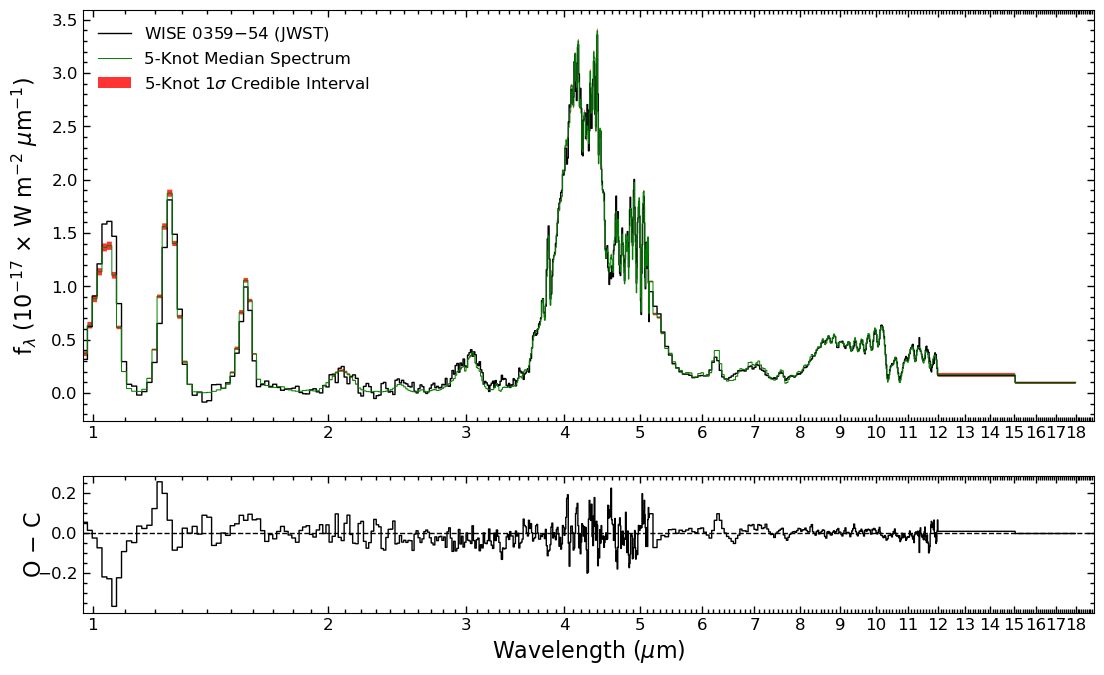

In [26]:
fig, ax_mod = plt.subplots(2, figsize=(fig_width_2*1.8, 0.6*fig_width_2*1.8), gridspec_kw={'height_ratios': [3,1]})

ax_mod[0].step(obspec[0,:],obspec[1,:]*10**17, linewidth=1,color='black',label = r"WISE 0359$-$54 (JWST)")
ax_mod[0].step(obspec[0],specdist[:,2]*10**17,linewidth=0.5,color='g', label = r"5-Knot Median Spectrum")
#ax_mod[0].step(obspec[0],topspec*10**17,linewidth=1.5,color='g', label = "Retrieved Max Likelihood Spectrum")

ax_mod[1].step(obspec[0],(residual_median)*10**17,linewidth=1,color='black')
#ax_mod[1].step(obspec[0],(residual_max)*10**17,linewidth=1.5,color='g', label = "Max Likelihood Residual")
ax_mod[0].fill_between(obspec[0],specdist[:,1]*10**17,specdist[:,3]*10**17,facecolor='red',alpha=0.8, step="pre", label='5-Knot 1$\sigma$ Credible Interval')

#ax1[0].set_xlabel(r'Wavelength ($\mu$m)', size=20)
ax_mod[0].set_ylabel(r'f$_{\lambda}$ ($10^{-17}$ $\times$ W m$^{-2}$ $\mu$m$^{-1}$)', size=labelsize)

ax_mod[1].set_xlabel(r'Wavelength ($\mu$m)', size=labelsize)
ax_mod[1].set_ylabel(r'O $-$ C', size=labelsize)

ax_mod[0].minorticks_on()
ax_mod[1].minorticks_on()

ax_mod[0].set_xscale('log', base=10)
ax_mod[1].set_xscale('log', base=10)

ticks = np.hstack((np.arange(.9, 19, step=.1)))#, np.arange(12, 24, step=.1)))
tlabel = np.full(len(ticks), '')

ax_mod[0].set_xticks(ticks, tlabel,minor=True)
ax_mod[1].set_xticks(ticks, tlabel, minor=True)

ax_mod[0].tick_params(axis='both',which='major', direction='in', top=True, right=True, length=tick_length, width=tick_width, labelsize=tick_labelsize)

ax_mod[0].tick_params(axis='both',which='minor', direction='in',  top=True, right=True, length=0.6*tick_length, width=tick_width, labelsize=tick_labelsize)

ax_mod[1].tick_params(axis='both',which='major', direction='in', top=True, right=True, length=tick_length, width=tick_width, labelsize=tick_labelsize)
ax_mod[1].tick_params(axis='both',which='minor', direction='in',  top=True, right=True, length=0.6*tick_length, width=tick_width, labelsize=tick_labelsize)

ax_mod[0].legend(fontsize = fontsize, frameon=False, loc='upper left')
#ax_mod[1].legend(fontsize = 20, frameon=False, loc='upper right')

ax_mod[0].set_xlim(min(obspec[0,:]), 19)
ax_mod[1].set_xlim(min(obspec[0,:]), 19)

ax_mod[1].axhline(0.0, linestyle = '--', linewidth=1,color='black')

ax_mod[0].xaxis.set_major_formatter(ScalarFormatter())
ax_mod[0].set_xticks(np.arange(1,19, step=1))
ax_mod[1].xaxis.set_major_formatter(ScalarFormatter())
ax_mod[1].set_xticks(np.arange(1, 19, step=1))

ax_mod[0].yaxis.labelpad = 8
ax_mod[1].yaxis.labelpad = -6

plt.savefig("/Users/harshil/Documents/Retreival_results/W0359/Spectrum.pdf", format='pdf',bbox_inches="tight")

plt.show()

In [13]:
obspec = np.loadtxt("/Users/harshil/PycharmProjects/Brewster/OSC_upload/0359/0359_full_spectrum.txt",dtype='d',unpack=True)

#modspec = np.empty([obspec[0].size,1])
#modspec_wo_phot = np.empty([obspec[0].size,1])
#modspec_wo_sfs = np.empty([obspec[0].size,1])
obspec_paper = np.loadtxt("/Users/harshil/PycharmProjects/Brewster/Archive/OSC_upload/0359/JWST_full_W0359_non_uniform_R.dat")
modspec_og = np.loadtxt("/Users/harshil/PycharmProjects/Brewster/Archive/Retrieved_model_spectrum/0359_with_dist.txt")[1,:]
modspec = np.loadtxt("/Users/harshil/PycharmProjects/Brewster/Retrieved_results/Retrieved_model_spectrum/0359_model_spectrum.txt")[0,:]
modspec_wo_phot = np.loadtxt("/Users/harshil/PycharmProjects/Brewster/Retrieved_results/Retrieved_model_spectrum/0359_model_spectrum_wo_photometry.txt")[0,:]
modspec_wo_sfs = np.loadtxt("/Users/harshil/PycharmProjects/Brewster/Retrieved_results/Retrieved_model_spectrum/0359_model_spectrum_wo_sfs.txt")[0,:]

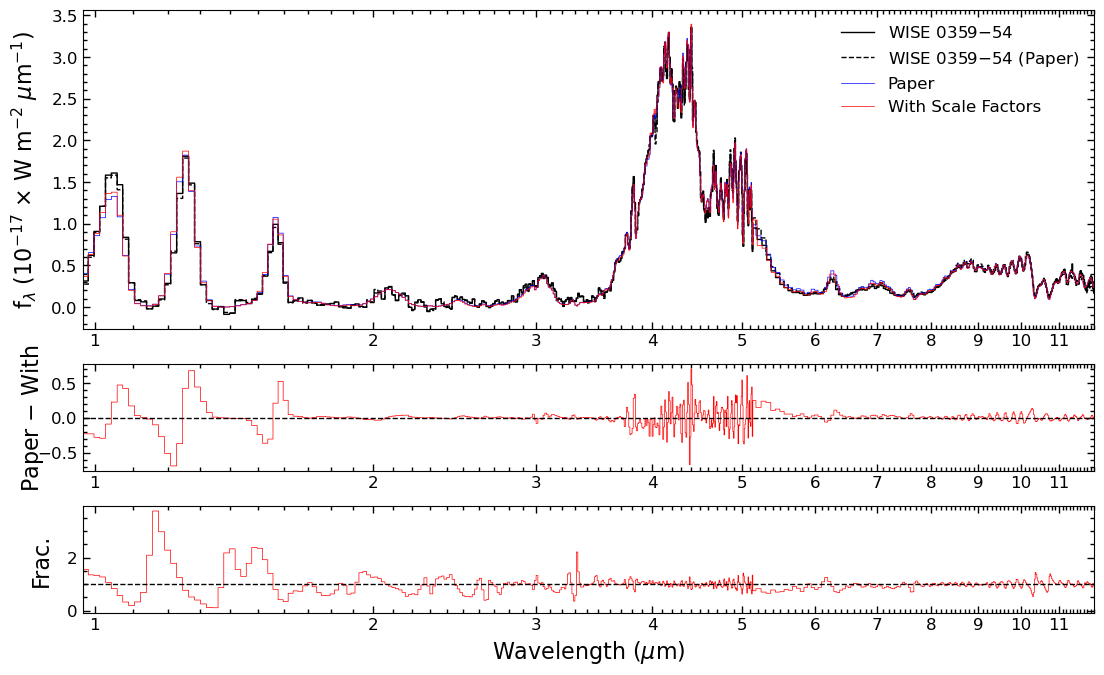

In [75]:
fig, ax_mod = plt.subplots(3, figsize=(fig_width_2*1.8, 0.6*fig_width_2*1.8), gridspec_kw={'height_ratios': [3,1,1]})

ax_mod[0].step(obspec[0,:],obspec[1,:]*10**17, linewidth=1,color='black',label = r"WISE 0359$-$54")
ax_mod[0].step(obspec_paper[:,0],obspec_paper[:,1]*10**17, linewidth=1,color='black',linestyle='--', label = r"WISE 0359$-$54 (Paper)")
ax_mod[0].step(obspec_paper[:,0],modspec_og*10**17,linewidth=0.5,color='b', label = r"Paper")
#ax_mod[0].step(obspec[0,:],modspec*10**17,linewidth=0.5,color='g', label = r"With Photometry & Scale Factors")
ax_mod[0].step(obspec[0,:-2],modspec_wo_phot*10**17,linewidth=0.5,color='r', label = r"With Scale Factors")
#ax_mod[0].step(obspec[0,:],modspec_wo_sfs*10**17,linewidth=0.5,color='b', label = r"With Photometry")

#ax_mod[1].step(obspec_paper[:,0],(obspec_paper[:,1]-modspec_og)*10**17, linewidth=0.5,color='g')
#ax_mod[1].step(obspec[0,:],(obspec[1,:]-modspec)*10**17, linewidth=0.5,color='g')
#ax_mod[1].step(obspec[0,:-2],(obspec[1,:-2]-modspec_wo_phot)*10**17, linewidth=0.5,color='r')
#ax_mod[1].step(obspec[0,:],(obspec[1,:]-modspec_wo_sfs)*10**17, linewidth=0.5,color='b')
ax_mod[1].step(obspec_paper[:,0],(modspec_og-modspec_wo_phot)*10**17, linewidth=0.5,color='r')
#ax_mod[1].step(obspec_paper[:,0],(modspec_og-modspec[:-2])*10**17, linewidth=0.5,color='g')

#ax_mod[2].step(obspec_paper[:,0],((obspec_paper[:,1]-modspec_og))/obspec_paper[:,1], linewidth=0.5,color='brown')
#ax_mod[2].step(obspec[0,:],((obspec[1,:]-modspec))/obspec[1,:], linewidth=0.5,color='g')
#ax_mod[2].step(obspec[0,:-2],((obspec[1,:-2]-modspec_wo_phot))/obspec[1,:-2], linewidth=0.5,color='r')
#ax_mod[2].step(obspec[0,:],((obspec[1,:]-modspec_wo_sfs))/obspec[1,:], linewidth=0.5,color='b')
ax_mod[2].step(obspec_paper[:,0],modspec_wo_phot/modspec_og, linewidth=0.5,color='r')
#ax_mod[2].step(obspec_paper[:,0],modspec[:-2]/modspec_og, linewidth=0.5,color='g')

#ax1[0].set_xlabel(r'Wavelength ($\mu$m)', size=20)
ax_mod[0].set_ylabel(r'f$_{\lambda}$ ($10^{-17}$ $\times$ W m$^{-2}$ $\mu$m$^{-1}$)', size=labelsize)

ax_mod[2].set_xlabel(r'Wavelength ($\mu$m)', size=labelsize)
#ax_mod[1].set_ylabel(r'O $-$ C', size=labelsize)
ax_mod[1].set_ylabel(r'Paper $-$ With', size=labelsize)
ax_mod[2].set_ylabel(r'Frac.', size=labelsize)

ax_mod[0].minorticks_on()
ax_mod[1].minorticks_on()
ax_mod[2].minorticks_on()

ax_mod[0].set_xscale('log', base=10)
ax_mod[1].set_xscale('log', base=10)
ax_mod[2].set_xscale('log', base=10)

ticks = np.hstack((np.arange(.9, 19, step=.1)))#, np.arange(12, 24, step=.1)))
tlabel = np.full(len(ticks), '')

ax_mod[0].set_xticks(ticks, tlabel,minor=True)
ax_mod[1].set_xticks(ticks, tlabel, minor=True)
ax_mod[2].set_xticks(ticks, tlabel, minor=True)

ax_mod[0].tick_params(axis='both',which='major', direction='in', top=True, right=True, length=tick_length, width=tick_width, labelsize=tick_labelsize)

ax_mod[0].tick_params(axis='both',which='minor', direction='in',  top=True, right=True, length=0.6*tick_length, width=tick_width, labelsize=tick_labelsize)

ax_mod[1].tick_params(axis='both',which='major', direction='in', top=True, right=True, length=tick_length, width=tick_width, labelsize=tick_labelsize)
ax_mod[1].tick_params(axis='both',which='minor', direction='in',  top=True, right=True, length=0.6*tick_length, width=tick_width, labelsize=tick_labelsize)

ax_mod[2].tick_params(axis='both',which='major', direction='in', top=True, right=True, length=tick_length, width=tick_width, labelsize=tick_labelsize)
ax_mod[2].tick_params(axis='both',which='minor', direction='in',  top=True, right=True, length=0.6*tick_length, width=tick_width, labelsize=tick_labelsize)

ax_mod[0].legend(fontsize = fontsize, frameon=False, loc='upper right')
#ax_mod[1].legend(fontsize = 20, frameon=False, loc='upper right')

ax_mod[0].set_xlim(min(obspec[0,:]), 12)
ax_mod[1].set_xlim(min(obspec[0,:]), 12)
ax_mod[2].set_xlim(min(obspec[0,:]), 12)

#ax_mod[2].set_ylim(-5, 5)

ax_mod[1].axhline(0.0, linestyle = '--', linewidth=1,color='black')
ax_mod[2].axhline(1.0, linestyle = '--', linewidth=1,color='black')

ax_mod[0].xaxis.set_major_formatter(ScalarFormatter())
ax_mod[0].set_xticks(np.arange(1,12, step=1))
ax_mod[1].xaxis.set_major_formatter(ScalarFormatter())
ax_mod[1].set_xticks(np.arange(1, 12, step=1))
ax_mod[2].xaxis.set_major_formatter(ScalarFormatter())
ax_mod[2].set_xticks(np.arange(1, 12, step=1))

ax_mod[0].yaxis.labelpad = 8
ax_mod[1].yaxis.labelpad = -6
ax_mod[2].yaxis.labelpad = 10

plt.savefig("/Users/harshil/Desktop/Model_spectra_comparison.pdf", format='pdf',bbox_inches="tight")

plt.show()

In [59]:
paper = (0.94/13.66)**2
with_sfs = (0.97/13.61)**2

In [60]:
paper, with_sfs

(0.004735374253197825, 0.005079573140940474, 0.004450963614004007)

In [69]:
with_all/paper

0.9399391422965663

In [70]:
np.median(modspec_wo_phot/modspec_og)

0.9897016470315683

In [71]:
np.median(modspec[:-2]/modspec_og)

0.988989178413288

In [78]:
(with_sfs - paper)/with_sfs * 100

6.776138037435977